<a href="https://colab.research.google.com/github/mannmoshe/machine-learning/blob/main/FinalProject/ConstructionPlans_withNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Construction plans<br>*By Moshe Mann*

**Overview**<br>
The Israel Planning Administration (IPA) is handling detailed construction plans.<BR>Every detailed plan contains a lot of data, among the rest, division of main and service area.<BR><BR>Main area is the area that divided among the tenants, like the departments,<BR> and the service area is common to all tenants, like parking, stairwell etc.<BR><BR>
In the near future the plans will not include the division between main and service area, because it is not important for the IPA as planning unit, but still, it is important data for regulation.<BR><BR> The purpose of the project is to predict the main and service areas based on the cell and plan features, so that the model can be used for regulatory purposes.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns

In [61]:
data = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData.csv')
data = data.drop_duplicates(subset="PL_NUMBER", keep="first")

In [62]:
data.shape

(2582, 17)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2582 entries, 0 to 13708
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PL_NUMBER                2582 non-null   object 
 1   PL_AREA                  2582 non-null   object 
 2   LANDUSE                  2582 non-null   object 
 3   MAIN_AREA                2582 non-null   float64
 4   SERVICE_AREA             2582 non-null   float64
 5   CELL_SIZE_TOTAL          2582 non-null   float64
 6   CELL_SIZE_MIN            2582 non-null   float64
 7   CELL_SIZE_MAX            2582 non-null   float64
 8   HOUSING_UNITS            2582 non-null   float64
 9   BUILDING_HEIGHT          2582 non-null   float64
 10  FLOORS_NUM               2582 non-null   float64
 11  TOTAL_AREA               2582 non-null   float64
 12  AUTHORITY                2582 non-null   object 
 13  DISTRICT                 2582 non-null   object 
 14  SECTOR_GROUP           

### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>PL_NUMBER : Number of plan</li>
          <br>
          <li>PL_AREA: Number of plan concatenate to number of area-cell</li>
          <br>          
          <li>LANDUSE: Usage of land</li>
          <br>
          <li>MAIN_AREA: Area divided among the tentants (square meter)<br>This is the dependent variable that need to be predicted!</li>
          <br>
          <li>SERVICE_AREA: Common area of all the tentants (square meter)</li>
          <br>
          <li>CELL_SIZE_TOTAL: The size of area-cell</li>
          <br>
          <li>CELL_SIZE_MIN: The minimum size of area-cell</li>
          <br>
          <li>CELL_SIZE_MAX: The maximum size of area-cell</li>
          <br>
          <li>HOUSING_UNITS: Number of housing units</li>
          <br>
          <li>BUILDING_HEIGHT: Height of building (meter)</li>
          <br>
          <li>FLOORS_NUM: Number of floors</li>
          <br>
          <li>TOTAL_AREA: Sum of Main area and Service area</li>
          <br>
          <li>AUTHORITY: Authority of plan</li>
          <br>
          <li>DISTRICT: District of plan</li>
          <br>
          <li>SECTOR_GROUP: Sector of plan</li>
          <br>
          <li>CONFIRMATION_YEAR: Year of plan's confirmation</li>
          <br>
          <li>CONSTRUCTION_TYPE_GROUP: Type of construction</li>          
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>

In [64]:
data.head()

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP
0,610-0197038,610-0197038-102,מגורים,975.0,300.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,מחוזית,דרום,חברה כללית / מעורבת,2017,חדשה
2,151-0392894,151-0392894-210,מגורים,960.0,180.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,מחוזית,ירושלים,חברה כללית / מעורבת,2017,התחדשות
73,תמל/ 1049,תמל/ 1049-123,מגורים,152.0,48.0,420.0,0.0,0.0,1.0,0.0,2.0,200.0,ארצית,מרכז,חברה כללית / מעורבת,2019,חדשה
297,553-0198077,553-0198077-201,מגורים,2090.0,1045.0,1496.0,0.0,0.0,19.0,25.5,6.0,3135.0,מחוזית,תל-אביב,חברה כללית / מעורבת,2017,חדשה
322,תמל/ 1029,תמל/ 1029-215,מגורים,675.0,225.0,563.0,0.0,0.0,4.0,21.0,4.0,900.0,ארצית,צפון,חברה ערבית,2018,חדשה


In [65]:
data['PL_NUMBER'].str.contains('תמל').sum()

60

In [66]:
data['IS_TAMAL'] = data['PL_NUMBER'].apply(lambda x: 1 if 'תמל' in x else 0)
data['IS_TAMAL'].value_counts()

0    2522
1      60
Name: IS_TAMAL, dtype: int64

In [67]:
data['LANDUSE'].value_counts()

מגורים                                2444
מגורים ומסחר                            66
מגורים מסחר ותעסוקה                     36
מגורים מסחר ותיירות                      6
מגורים ומבנים ומוסדות ציבור              6
מגורים תעסוקה ותיירות                    5
מגורים מסחר ומבנים ומוסדות ציבור         5
מגורים ודיור מיוחד                       3
תתתת מגורים ב                            2
מגורים מסחר ותחבורה                      2
מגורים ומשרדים                           2
מגורים ותיירות                           2
מגורים ואירוח כפרי                       1
מגורים תיירות ומבנים ומוסדות ציבור       1
מגורים ותחבורה                           1
Name: LANDUSE, dtype: int64

In [68]:
data['LANDUSE'] = data['LANDUSE'].mask(data['LANDUSE'] != 'מגורים', 'מגורים משולב')

In [69]:
data['LANDUSE'].value_counts()

מגורים          2444
מגורים משולב     138
Name: LANDUSE, dtype: int64

Now let's explore the Main & Service columns.

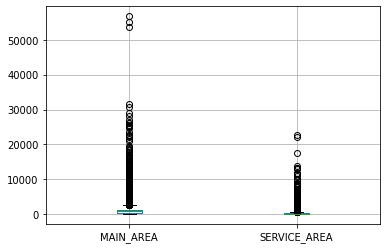

In [70]:
data[["MAIN_AREA","SERVICE_AREA"]].boxplot()

The outliers are probably mistakes. let's see the distribution:

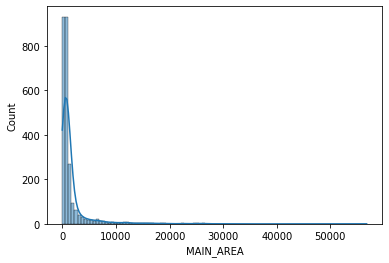

In [71]:
sns.histplot(data=data, x="MAIN_AREA", bins=100, kde=True)

In [72]:
data.iloc[:, 3].describe(percentiles=np.arange(0.05, 1, .05))

count     2582.000000
mean      1706.856285
std       3689.516420
min          0.000000
5%         192.510000
10%        225.000000
15%        280.000000
20%        348.000000
25%        412.125000
30%        480.000000
35%        557.350000
40%        600.320000
45%        688.000000
50%        750.000000
55%        829.275000
60%        900.000000
65%        967.965000
70%       1080.910000
75%       1239.750000
80%       1481.100000
85%       2052.550000
90%       3398.500000
95%       6897.850000
max      56768.000000
Name: MAIN_AREA, dtype: float64

In [73]:
filter_main_area = data['MAIN_AREA'] <= 8580
filtered_data = data.loc[filter_main_area]

Let's explore how many rows we have now, and the main and service data.

In [74]:
print("Remaining rows:", filtered_data.shape[0], filtered_data.shape[0]/data.shape[0])

Remaining rows: 2483 0.9616576297443842


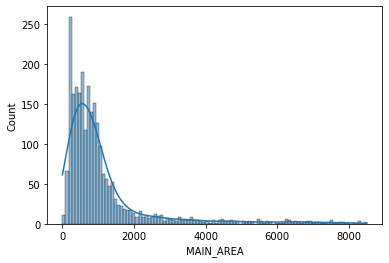

In [75]:
sns.histplot(data=filtered_data, x="MAIN_AREA", bins=100, kde=True)

Let's do the same for the Service column.

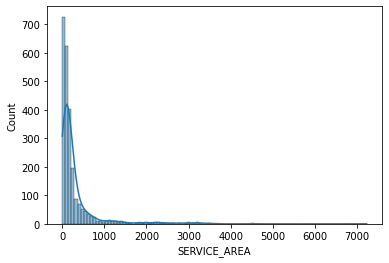

In [76]:
sns.histplot(data=filtered_data, x="SERVICE_AREA", bins=100, kde=True)

In [77]:
filtered_data.iloc[:, 4].describe(percentiles=np.arange(0.05, 1, .05))

count    2483.000000
mean      297.558218
std       545.601120
min         0.000000
5%         20.000000
10%        36.230000
15%        50.000000
20%        56.000000
25%        63.310000
30%        77.240000
35%        88.000000
40%        96.712000
45%       111.000000
50%       127.800000
55%       148.000000
60%       162.632000
65%       187.000000
70%       214.000000
75%       251.551500
80%       320.600000
85%       439.700000
90%       641.480000
95%      1270.800000
max      7230.000000
Name: SERVICE_AREA, dtype: float64

In [78]:
filter_service_area = filtered_data['SERVICE_AREA'] <= 2220
filtered_data = filtered_data.loc[filter_service_area]

In [79]:
print("Remaining rows:", filtered_data.shape[0], filtered_data.shape[0]/data.shape[0])

Remaining rows: 2422 0.9380325329202169


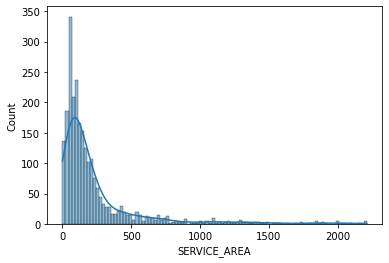

In [80]:
sns.histplot(data=filtered_data, x="SERVICE_AREA", bins=100, kde=True)

Those columns ['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN',
       'CELL_SIZE_MAX'] describe the cell size.

In [81]:
filtered_data[['CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX']].describe()

,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX
count,2422.000000,2422.000000,2422.000000
mean,812.473869,152.211672,7.064327
std,1527.508667,880.434996,102.600429
min,0.000000,0.000000,0.000000
25%,369.250000,0.000000,0.000000
50%,622.500000,0.000000,0.000000
75%,994.000000,0.000000,0.000000
max,63924.000000,32000.000000,2340.000000


HOUSING_UNITS shold not be zero.

In [82]:
data['HOUSING_UNITS'].value_counts().sort_index()

0.0        79
1.0       353
2.0       225
3.0       162
4.0       393
         ... 
471.0       1
524.0       1
564.0       1
613.0       1
1200.0      1
Name: HOUSING_UNITS, Length: 147, dtype: int64

In [83]:
filtered_data['HOUSING_UNITS'] = filtered_data['HOUSING_UNITS'].mask(data['HOUSING_UNITS'] == 0, data['FLOORS_NUM']*2)

In [84]:
filtered_data['HOUSING_UNITS'].value_counts().sort_index()

0.0        2
1.0      353
2.0      227
3.0      162
4.0      406
        ... 
135.0      1
207.0      1
362.0      1
524.0      1
613.0      1
Name: HOUSING_UNITS, Length: 78, dtype: int64

In [85]:
filtered_data = filtered_data[filtered_data['HOUSING_UNITS'] > 0]
filtered_data.shape 

(2420, 18)

In [86]:
filtered_data['BUILDING_HEIGHT'].value_counts()[:11]

12.00    245
0.00     208
8.50     178
15.00    161
9.00     125
12.50     67
14.00     57
12.48     53
18.00     48
16.00     43
10.00     43
13.00     43
8.00      42
9.50      38
7.50      38
7.00      34
15.60     31
11.00     31
Name: BUILDING_HEIGHT, dtype: int64

A lot of missing data, BUILDING_HEIGHT should not be zero.<br>
I will replace it with the mean of BUILDING_HEIGHT with correct values (greather than 0).

In [87]:
building_height_avg = round(filtered_data[filtered_data['BUILDING_HEIGHT'] > 0]['BUILDING_HEIGHT'].mean())
building_height_avg

14

In [88]:
filtered_data['BUILDING_HEIGHT'] = filtered_data['BUILDING_HEIGHT'].mask(filtered_data['BUILDING_HEIGHT']==0, building_height_avg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [89]:
filtered_data['BUILDING_HEIGHT'].value_counts()

14.00    265
12.00    245
8.50     178
15.00    161
9.00     125
        ... 
16.64      1
13.21      1
5.10       1
18.19      1
27.40      1
Name: BUILDING_HEIGHT, Length: 429, dtype: int64

In [90]:
filtered_data['SECTOR_GROUP'].value_counts()

חברה ערבית             1265
חברה כללית / מעורבת     897
חברה חרדית              201
(חסר)                    57
Name: SECTOR_GROUP, dtype: int64

In [91]:
filtered_data['SECTOR_GROUP'] = filtered_data['SECTOR_GROUP'].mask(filtered_data['SECTOR_GROUP'] == '(חסר)', 'חברה כללית / מעורבת')
filtered_data['SECTOR_GROUP'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


חברה ערבית             1265
חברה כללית / מעורבת     954
חברה חרדית              201
Name: SECTOR_GROUP, dtype: int64

In [92]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420 entries, 0 to 13708
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PL_NUMBER                2420 non-null   object 
 1   PL_AREA                  2420 non-null   object 
 2   LANDUSE                  2420 non-null   object 
 3   MAIN_AREA                2420 non-null   float64
 4   SERVICE_AREA             2420 non-null   float64
 5   CELL_SIZE_TOTAL          2420 non-null   float64
 6   CELL_SIZE_MIN            2420 non-null   float64
 7   CELL_SIZE_MAX            2420 non-null   float64
 8   HOUSING_UNITS            2420 non-null   float64
 9   BUILDING_HEIGHT          2420 non-null   float64
 10  FLOORS_NUM               2420 non-null   float64
 11  TOTAL_AREA               2420 non-null   float64
 12  AUTHORITY                2420 non-null   object 
 13  DISTRICT                 2420 non-null   object 
 14  SECTOR_GROUP           

Let's handle null values:

In [93]:
filtered_data.isnull().sum()

PL_NUMBER                  0
PL_AREA                    0
LANDUSE                    0
MAIN_AREA                  0
SERVICE_AREA               0
CELL_SIZE_TOTAL            0
CELL_SIZE_MIN              0
CELL_SIZE_MAX              0
HOUSING_UNITS              0
BUILDING_HEIGHT            0
FLOORS_NUM                 0
TOTAL_AREA                 0
AUTHORITY                  0
DISTRICT                   0
SECTOR_GROUP               0
CONFIRMATION_YEAR          0
CONSTRUCTION_TYPE_GROUP    4
IS_TAMAL                   0
dtype: int64

In [94]:
filtered_data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       1437
התחדשות     850
הסדרה       129
NaN           4
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas

In [95]:
filtered_data['CONSTRUCTION_TYPE_GROUP'] = filtered_data['CONSTRUCTION_TYPE_GROUP'].fillna(filtered_data['CONSTRUCTION_TYPE_GROUP'].mode().iloc[0])
filtered_data['CONSTRUCTION_TYPE_GROUP'].value_counts(dropna=False)

חדשה       1441
התחדשות     850
הסדרה       129
Name: CONSTRUCTION_TYPE_GROUP, dtype: int64

In [96]:
filtered_data = filtered_data.drop(['PL_NUMBER', 'PL_AREA', 'SERVICE_AREA'], axis=1)

Now let's get dummies of the categorical columns so we will be able to bulid a model.

In [97]:
dummies_data = pd.get_dummies(filtered_data)
print(dummies_data.shape)
dummies_data.columns = ['MAIN_AREA', 'CELL_SIZE_TOTAL', 'CELL_SIZE_MIN', 'CELL_SIZE_MAX',
       'HOUSING_UNITS', 'BUILDING_HEIGHT', 'FLOORS_NUM', 'TOTAL_AREA',
       'CONFIRMATION_YEAR', 'IS_TAMAL', 'LANDUSE_RESIDENCE',
       'LANDUSE_RESIDENCE_MIXED', 'AUTHORITY_COUNTRY', 'AUTHORITY_DISTRICT',
       'DISTRICT_SOUTH', 'DISTRICT_HAIFA', 'DISTRICT_JERUSALEM', 'DISTRICT_DAN',
       'DISTRICT_NORTH', 'DISTRICT_TEL_AVIV', 'SECTOR_REL',
       'SECTOR_MIXED', 'SECTOR_ARAB',
       'CONSTRUCTION_TYPE_ARRANGING', 'CONSTRUCTION_TYPE_REGENERATION',
       'CONSTRUCTION_TYPE_NEW']
dummies_data.head()

(2420, 26)


,MAIN_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,CONFIRMATION_YEAR,IS_TAMAL,LANDUSE_RESIDENCE,LANDUSE_RESIDENCE_MIXED,AUTHORITY_COUNTRY,AUTHORITY_DISTRICT,DISTRICT_SOUTH,DISTRICT_HAIFA,DISTRICT_JERUSALEM,DISTRICT_DAN,DISTRICT_NORTH,DISTRICT_TEL_AVIV,SECTOR_REL,SECTOR_MIXED,SECTOR_ARAB,CONSTRUCTION_TYPE_ARRANGING,CONSTRUCTION_TYPE_REGENERATION,CONSTRUCTION_TYPE_NEW
0,975.0,2466.0,0.0,0.0,16.0,11.0,2.0,1275.0,2017,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,960.0,2820.0,0.0,0.0,6.0,17.0,4.0,1140.0,2017,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
73,152.0,420.0,0.0,0.0,1.0,14.0,2.0,200.0,2019,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
297,2090.0,1496.0,0.0,0.0,19.0,25.5,6.0,3135.0,2017,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
322,675.0,563.0,0.0,0.0,4.0,21.0,4.0,900.0,2018,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [98]:
corr = dummies_data.corr()
print(corr.loc['MAIN_AREA'].sort_values(ascending=False))

MAIN_AREA                         1.000000
TOTAL_AREA                        0.988502
FLOORS_NUM                        0.601179
BUILDING_HEIGHT                   0.529082
HOUSING_UNITS                     0.385340
CELL_SIZE_TOTAL                   0.317110
DISTRICT_TEL_AVIV                 0.190624
CONSTRUCTION_TYPE_REGENERATION    0.184773
DISTRICT_JERUSALEM                0.120476
LANDUSE_RESIDENCE_MIXED           0.106066
IS_TAMAL                          0.056269
AUTHORITY_COUNTRY                 0.056269
CELL_SIZE_MIN                     0.038475
SECTOR_REL                        0.029058
CELL_SIZE_MAX                     0.025697
SECTOR_ARAB                       0.019719
DISTRICT_HAIFA                    0.013704
CONSTRUCTION_TYPE_ARRANGING      -0.021553
SECTOR_MIXED                     -0.036564
CONFIRMATION_YEAR                -0.041538
DISTRICT_DAN                     -0.053162
AUTHORITY_DISTRICT               -0.056269
DISTRICT_SOUTH                   -0.060296
DISTRICT_NO

In [99]:
feature_cols = ['TOTAL_AREA'] #['TOTAL_AREA', 'FLOORS_NUM', 'BUILDING_HEIGHT', 'CELL_SIZE_TOTAL', 'HOUSING_UNITS'] 

In [100]:
X = dummies_data[feature_cols]
y = dummies_data['MAIN_AREA']

In [101]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # transform data
# X_scaled = scaler.fit_transform(X)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
# find best n_neighbors

params = {'n_neighbors':[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'weights':['uniform', 'distance']}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [104]:
neigh = KNeighborsRegressor(n_neighbors=5, weights='distance')
neigh.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [105]:
y_pred = neigh.predict(X_test)

In [106]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
rsquared = r2_score(y_test, y_pred)
print("R Squared:", rsquared)

MAE: 96.78126563831195
MSE: 34364.61193529874
RMSE: 185.37694553341507
R Squared: 0.9705716478540602


https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe

In [107]:
result_df = pd.DataFrame(y_test)
result_df['y_pred'] = y_pred
result_df.T

,7948,4600,12874,12135,12452,11735,5244,13369,12700,12923,12726,12891,10913,1801,12842,1950,13334,13260,13107,11925,12860,13231,13489,4476,13220,10229,2593,11371,11312,13371,11905,1554,11425,13619,12147,12410,11060,12454,12109,12557,...,13665,10191,12432,5400,13261,4775,13578,11007,7971,11486,11474,11040,12988,12379,13702,12559,11253,13040,9301,11549,4777,12754,13425,12633,12550,12642,1364,13383,11645,5636,12588,11043,13148,13267,12372,13620,13664,13417,9043,12096
MAIN_AREA,1826.020000,840.0,610.0,200.0,546.000000,432.0,3095.000000,850.0,864.320000,704.0,775.750000,976.0,750.0,583.0,440.0,416.160000,685.0,7125.000000,583.0,736.0,3407.000000,523.0,1521.000000,280.0,4450.000000,360.0,702.0,1659.00000,3240.000000,1126.300000,6264.000000,384.000000,971.0,351.0,460.000000,482.0,1914.360000,680.000000,807.000000,480.0,...,1036.260000,1032.0,785.190000,4847.000000,250.0,1350.0,404.250000,320.0,457.5,300.0,1584.000000,960.0,4215.000000,942.0,1238.400000,570.500000,172.000000,1638.450000,520.0,2464.300000,200.0,80.0,424.000000,5626.530000,1200.0,710.300000,370.0,500.0,553.0,521.0,900.0,355.0,804.0,215.00,483.520000,750.000000,1045.0,225.0,761.00,1799.000000
y_pred,1813.330656,798.5,578.4,215.0,702.812227,449.5,1928.946179,791.0,810.179672,681.6,907.218995,1300.0,728.0,620.0,360.0,409.640925,765.0,5305.552066,656.0,797.0,3207.674426,509.0,1130.992481,311.6,4700.416612,360.0,749.0,1358.60358,2869.998036,958.259055,6393.813118,422.052632,900.0,420.0,595.309524,477.1,1898.472729,592.921212,799.339224,555.5,...,1069.485943,1328.0,644.394752,5236.756386,280.0,1172.5,388.031542,330.0,566.4,306.8,1556.153846,886.2,4832.381155,900.0,1218.976166,680.315789,152.140623,1464.271026,485.0,2150.416032,215.0,80.0,456.071429,5016.630851,1300.0,676.093644,345.0,472.5,494.0,659.5,886.2,300.0,835.0,181.25,518.204082,789.433068,1029.8,242.0,752.35,1801.038355


In [108]:
all_data_with_predictions = pd.merge(data, result_df, left_index=True, right_index=True)
all_data_with_predictions.head()

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA_x,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,IS_TAMAL,MAIN_AREA_y,y_pred
445,306-0464982,306-0464982-2A,מגורים,450.5,0.00,902.00,900.0,0.0,2.0,14.0,4.0,450.50,מחוזית,חיפה,חברה כללית / מעורבת,2019,התחדשות,0,450.5,371.095238
739,תמל/ 1050,תמל/ 1050-13,מגורים,240.0,80.00,557.00,0.0,0.0,1.0,0.0,2.0,320.00,ארצית,דרום,חברה כללית / מעורבת,2017,חדשה,1,240.0,275.400000
993,101-0415521,101-0415521-1,מגורים,962.3,271.32,583.00,0.0,0.0,9.0,15.6,5.0,1233.62,מחוזית,ירושלים,חברה ערבית,2018,התחדשות,0,962.3,1105.379406
996,455-0501718,455-0501718-1,מגורים,310.0,60.00,999.94,0.0,0.0,1.0,7.0,2.0,370.00,מחוזית,מרכז,חברה כללית / מעורבת,2019,חדשה,0,310.0,265.000000
1238,455-0153890,455-0153890-1000,מגורים,2735.0,1192.00,752.00,0.0,0.0,24.0,0.0,7.0,3927.00,מחוזית,מרכז,חברה כללית / מעורבת,2017,התחדשות,0,2735.0,3090.802267


In [109]:
from google.colab import files
# all_data_with_predictions.to_csv('all_data_with_predictions.csv', encoding='utf-8-sig')
# files.download("all_data_with_predictions.csv")

In [110]:
new_data = pd.read_csv('https://raw.githubusercontent.com/mannmoshe/machine-learning/main/FinalProject/cellsData_New.csv')
new_data = new_data.drop_duplicates(subset="PL_NUMBER", keep="first")
new_data = new_data[new_data['MAIN_AREA'] < 8580]
new_data = new_data[new_data['SERVICE_AREA'] < 2220]

In [111]:
X_new = new_data[feature_cols]
# X_new_scaled = scaler.fit_transform(X_new)
y_new = new_data['MAIN_AREA']

In [112]:
y_new_pred = neigh.predict(X_new)

In [113]:
mae = mean_absolute_error(y_new, y_new_pred)
print("MAE:", mae)
mse = mean_squared_error(y_new, y_new_pred)
print("MSE:", mse)
rmse = mean_squared_error(y_new, y_new_pred, squared=False)
print("RMSE:", rmse)
rsquared = r2_score(y_new, y_new_pred)
print("R Squared:", rsquared)

MAE: 73.45069570376239
MSE: 19411.904670589152
RMSE: 139.32661149467876
R Squared: 0.982792696346035


In [114]:
new_result_df = pd.DataFrame(y_new)
new_result_df['y_pred'] = y_new_pred
print(new_result_df.shape)
new_result_df.T

(30, 2)


,0,1,3,7,8,18,282,328,333,334,336,338,339,340,341,343,344,345,346,348,349,350,351,352,353,354,355,356,357,358
MAIN_AREA,576.0,220.0,570.400000,728.0,3250.000000,953.000000,720.0,324.000000,1894.000000,220.000000,160.0,190.000000,240.0,576.0,3060.0,897.0,332.4,4400.000000,230.0,1456.00000,230.0,370.0,383.14000,240.0,480.00,527.050000,810.600000,811.000000,920.0,3034.000000
y_pred,578.4,234.0,562.535974,681.6,3171.908762,1152.308033,695.2,357.964837,2000.003282,228.617021,175.0,260.428571,242.0,578.4,2800.0,825.0,330.0,4814.457193,201.4,1397.75186,237.0,381.5,389.96609,242.0,528.75,637.684972,826.188044,807.573391,971.5,2534.687186


In [115]:
all_new_data_with_predictions = pd.merge(new_data, new_result_df, left_index=True, right_index=True)
all_new_data_with_predictions.head()

,PL_NUMBER,PL_AREA,LANDUSE,MAIN_AREA_x,SERVICE_AREA,CELL_SIZE_TOTAL,CELL_SIZE_MIN,CELL_SIZE_MAX,HOUSING_UNITS,BUILDING_HEIGHT,FLOORS_NUM,TOTAL_AREA,AUTHORITY,DISTRICT,SECTOR_GROUP,CONFIRMATION_YEAR,CONSTRUCTION_TYPE_GROUP,MAIN_AREA_y,y_pred
0,257-0744540,257-0744540-1,מגורים,576.0,96.0,400.0,0,0,0,12.5,4,672.0,מחוזית,צפון,חברה ערבית,2021,חדשה,576.0,578.400000
1,633-0921650,633-0921650-13,מגורים,220.0,60.0,500.0,0,0,1,10.5,2,280.0,מחוזית,דרום,חברה כללית / מעורבת,2021,חדשה,220.0,234.000000
3,204-0765354,204-0765354-4,מגורים,570.4,92.0,460.0,0,0,4,14.4,4,662.4,מחוזית,צפון,חברה ערבית,2021,חדשה,570.4,562.535974
7,101-0902015,101-0902015-1,מגורים,728.0,72.0,501.0,0,0,5,12.0,4,800.0,מחוזית,ירושלים,חברה ערבית,2021,התחדשות,728.0,681.600000
8,354-0846360,354-0846360-100,מגורים,3250.0,1000.0,1160.0,0,0,24,0.0,6,4250.0,מחוזית,חיפה,חברה ערבית,2021,חדשה,3250.0,3171.908762


In [116]:
from google.colab import files
# all_new_data_with_predictions.to_csv('all_new_data_with_predictions.csv', encoding='utf-8-sig')
# files.download("all_new_data_with_predictions.csv")